## Energy saved from recycling
---

**Project Description**
Did you know that recycling saves energy by reducing or eliminating the need to make materials from scratch? For example, aluminum can manufacturers can skip the energy-costly process of producing aluminum from ore by cleaning and melting recycled cans. Aluminum is classified as a non-ferrous metal.

Singapore has an ambitious goal of becoming a zero-waste nation. The amount of waste disposed of in Singapore has increased seven-fold over the last 40 years. At this rate, Semakau Landfill, Singapore’s only landfill, will run out of space by 2035. Making matters worse, Singapore has limited land for building new incineration plants or landfills.

The government would like to motivate citizens by sharing the total energy that the combined recycling efforts have saved every year. They have asked you to help them.

You have been provided with three datasets. The data come from different teams, so the names of waste types may differ.
<img src="images/waste_stats.png" width="400px"/>

**Question to answer**:<br>
How much energy in kiloWatt hour (kWh) has Singapore saved per year by recycling glass, plastic, ferrous, and non-ferrous metals between 2015 and 2019?

### Table of Contents:
* [Get to know the datasets](#get_to_know)
* [Clean data](#clean)




### Get to know the datasets <a class="anchor" id="get_to_know"/>
With the information given above, we see that two datasets (2003-2017 and 2018-2019) have different column names. However, some of them are identical. What I want to do is to check the datasets' contents, metrics, missing values, and similarities. If they end up being on the same scale, we will be able to merge them to form one datasets that stores values from 2003 to 2019.

From the first sight, we can relate the following columns (left: 2003-2017, right: 2018-2019):<br>
waste_type = Waste Type <br>
total_waste_recycle_tonne = Total Recycled <br>
total_waste_generated = Total Generated <br>
year = Year <br>

Let's check if that's the case!

In [17]:
# import packages
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# load data
stats2003_2017 = pd.read_csv('datasets/wastestats.csv')
stats2018_2019 = pd.read_csv('datasets/2018_2019_waste.csv')

# we need to skip the first three rows since it includes description
energy_saved = pd.read_csv('datasets/energy_saved.csv', skiprows=3, index_col=0)


In [4]:
# show first three rows
stats2003_2017.head(3)

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016


In [5]:
# show first three rows
stats2018_2019.head(3)

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1440,1434,2019
1,Ferrous Metal,1278,1270,2019
2,Paper/Cardboard,1011,449,2019


In [6]:
energy_saved


,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
material,,,,,
energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4000 kWh
crude_oil saved,16 barrels,NaN,1.8 barrels,40 barrels,1.7 barrels


### Clean Data <a class="anchor" id="clean"/>

**Structures** of the 2003-2017 and 2018-2019 are pretty much the same. However, if we look at unique values, we see the first has duplications. Therefore, let's take care of it.

In [7]:
unique_waste2003_2017 = stats2003_2017['waste_type'].unique()
unique_waste2018_2019 = stats2018_2019['Waste Type'].unique()

print(f'2003-2017 has {len(unique_waste2003_2017)} types of waste:\n', unique_waste2003_2017)
print('\n=============\n')
print(f'2018-2019 has {len(unique_waste2018_2019)} types of waste:\n', unique_waste2018_2019)


2003-2017 has 32 types of waste:
 ['Food' 'Paper/Cardboard' 'Plastics' 'C&D' 'Horticultural waste' 'Wood'
 'Ferrous metal' 'Non-ferrous metal' 'Used slag' 'Ash & Sludge' 'Glass'
 'Textile/Leather' 'Scrap tyres' 'Others (stones, ceramics & rubber etc.)'
 'Total' 'Others (stones, ceramics & rubber etc)' 'Food waste'
 'Construction Debris' 'Wood/Timber' 'Horticultural Waste' 'Ferrous Metal'
 'Non-ferrous Metals' 'Used Slag' 'Sludge' 'Scrap Tyres' 'Ferrous Metals'
 'Others' 'Construction debris' 'Non-ferrous metals' 'Ash and sludge'
 'Plastic' 'Others (stones, ceramic, rubber, etc.)']


2018-2019 has 15 types of waste:
 ['Construction& Demolition' 'Ferrous Metal' 'Paper/Cardboard' 'Plastics'
 'Food' 'Wood' 'Horticultural' 'Ash & Sludge' 'Textile/Leather'
 'Used Slag' 'Non-Ferrous Metal' 'Glass' 'Scrap Tyres'
 'Others (stones, ceramic, rubber, ect)' 'Overall']


In [8]:
# print what they have in common
print('Common:')
print(list(set(unique_waste2003_2017).intersection(set(unique_waste2018_2019))))

print('\n=============\n')

# print how they differ
print('Difference:')
print(list(set(unique_waste2003_2017).difference(set(unique_waste2018_2019))))


Common:
['Glass', 'Used Slag', 'Scrap Tyres', 'Food', 'Wood', 'Ferrous Metal', 'Ash & Sludge', 'Paper/Cardboard', 'Plastics', 'Textile/Leather']


Difference:
['Non-ferrous Metals', 'Others', 'C&D', 'Sludge', 'Scrap tyres', 'Ash and sludge', 'Plastic', 'Non-ferrous metal', 'Construction Debris', 'Non-ferrous metals', 'Wood/Timber', 'Horticultural waste', 'Total', 'Food waste', 'Others (stones, ceramics & rubber etc)', 'Construction debris', 'Horticultural Waste', 'Others (stones, ceramic, rubber, etc.)', 'Others (stones, ceramics & rubber etc.)', 'Used slag', 'Ferrous Metals', 'Ferrous metal']


In [10]:
def replace(name):
    """
    This function cleans up the waste types' names.
        name: Name that needs to be taken care of
    returns: Prettified representation of the class name
    """
    name = re.sub('[\.]+', '', name.lower())
    name = name.replace('  ', ' ').replace('and', '&').replace('overall', 'total')
    if name.startswith('construction') or name.startswith('c&d'):
        name = 'construction & demolition'
    elif name.startswith('others'):
        name = 'others (stones, ceramics & rubber etc.)'
    elif name.startswith('plastic'):
        name = 'plastics'
    elif name.startswith('horticultural'):
        name = 'horticultural'
    elif name.startswith('non-ferrous'):
        name = 'non-ferrous metal'
    elif name.startswith('food'):
        name = 'food'
    elif name.startswith('ferrous'):
        name = 'ferrous'
    elif name.startswith('wood'):
        name = 'wood'
    elif name.startswith('sludge'):
        name = 'ash & sludge'

    return name.title()


# apply transformations
stats2003_2017['waste_type'] = stats2003_2017['waste_type'].apply(replace)
stats2018_2019['Waste Type'] = stats2018_2019['Waste Type'].apply(replace)

# get unique values once again
unique_waste2003_2017 = stats2003_2017['waste_type'].unique()
unique_waste2018_2019 = stats2018_2019['Waste Type'].unique()

# verify there is no difference in waste types
assert set(unique_waste2003_2017) == set(unique_waste2018_2019)

In [11]:
print(stats2003_2017.info())

print('\n=============\n')

print(stats2018_2019.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    float64
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Waste Type                     30 non-null     object
 1   Total Generated ('000 tonnes)  30 non-null     int64 
 2   Total Recycled ('00

It's safe to alter the datasets by changing their names as well as adding more columns to the 2018-2019 columns

In [12]:
COLUMNS = ['Waste Type', 'Total Disposed (thousands)', 'Total Recycled (thousands)',
                'Total Generated (thousands)', 'Recycling Rate', 'Year']

#
stats2003_2017.columns = COLUMNS
stats2003_2017[['Total Disposed (thousands)', 'Total Recycled (thousands)', 'Total Generated (thousands)']] /= 1000

# check first 5 entries
stats2003_2017.head()

,Waste Type,Total Disposed (thousands),Total Recycled (thousands),Total Generated (thousands),Recycling Rate,Year
0,Food,679.9,111.1,791.0,0.14,2016
1,Paper/Cardboard,576.0,607.1,1183.1,0.51,2016
2,Plastics,762.7,59.5,822.2,0.07,2016
3,Construction & Demolition,9.7,1585.7,1595.4,0.99,2016
4,Horticultural,111.5,209.0,320.5,0.65,2016


In [14]:
disposed = stats2018_2019['Total Generated (\'000 tonnes)'] - stats2018_2019['Total Recycled (\'000 tonnes)']
recycling_rate = round(stats2018_2019['Total Recycled (\'000 tonnes)'] / stats2018_2019['Total Generated (\'000 tonnes)'], 3)

# add missing columns
stats2018_2019['Total Disposed (thousands)'] = disposed
stats2018_2019['Recycling Rate'] = recycling_rate
stats2018_2019.head()


,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year,Total Disposed (thousands),Recycling Rate
0,Construction & Demolition,1440,1434,2019,6,0.996
1,Ferrous,1278,1270,2019,8,0.994
2,Paper/Cardboard,1011,449,2019,562,0.444
3,Plastics,930,37,2019,893,0.040
4,Food,7440,136,2019,7304,0.018


In [15]:
# change column order for 2018-2019 dataset
stats2018_2019 = stats2018_2019[['Waste Type', 'Total Disposed (thousands)', 'Total Recycled (\'000 tonnes)',
                'Total Generated (\'000 tonnes)', 'Recycling Rate', 'Year']]

# change column names
stats2018_2019.columns = COLUMNS
stats2018_2019.head()

,Waste Type,Total Disposed (thousands),Total Recycled (thousands),Total Generated (thousands),Recycling Rate,Year
0,Construction & Demolition,6,1434,1440,0.996,2019
1,Ferrous,8,1270,1278,0.994,2019
2,Paper/Cardboard,562,449,1011,0.444,2019
3,Plastics,893,37,930,0.040,2019
4,Food,7304,136,7440,0.018,2019


In [16]:
all_years = pd.concat([stats2003_2017, stats2018_2019], ignore_index=True)
assert len(all_years) == len(stats2003_2017) + len(stats2018_2019)

## Visualize

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Horticultural', 'Wood', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Horticultural', 'Wood', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Horticultural', 'Wood', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Food', 'Paper/Cardboard', 'Plastics', 'Construction & Demolition', 'Wood', 'Horticultural', 'Ferrous', 'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Construction & Demolition', 'Ferrous', 'Used Slag', 'Non-Ferrous Metal', 'Scrap Tyres', 'Wood', 'Horticultural', 'Paper/Cardboard', 'Glass', 'Food', 'Ash & Sludge', 'Plastics', 'Textile/Leather', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Construction & Demolition', 'Ferrous', 'Paper/Cardboard', 'Plastics', 'Food', 'Wood', 'Horticultural', 'Ash & Sludge', 'Textile/Leather', 'Used Slag', 'Non-Ferrous Metal', 'Glass', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total', 'Construction & Demolition', 'Ferrous', 'Paper/Cardboard', 'Plastics', 'Food', 'Wood', 'Horticultural', 'Ash & Sludge', 'Textile/Leather', 'Used Slag', 'Non-Ferrous Metal', 'Glass', 'Scrap Tyres', 'Others (Stones, Ceramics & Rubber Etc.)', 'Total']

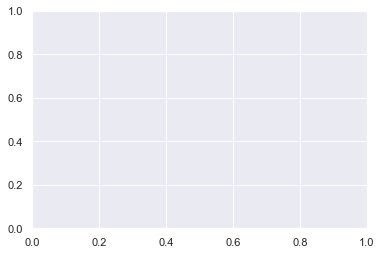

In [23]:
grouped_by_waste = all_years.groupby(['Waste Type', 'Year'])
plt.scatter(all_years['Year'], all_years['Recycling Rate'], c=all_years['Waste Type'].tolist())